In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
path = 'https://raw.githubusercontent.com/rohitgupta29/Datasets/master/Market/Advertising.csv'

df = pd.read_csv(path)

In [38]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [39]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [40]:
df.shape

(200, 5)

In [41]:
df.drop('Unnamed: 0', axis = 1)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


## Preparing Data

In [46]:
X = df.drop('sales', axis = 1)
X

,Unnamed: 0,TV,radio,newspaper
0,1,230.1,37.8,69.2
1,2,44.5,39.3,45.1
2,3,17.2,45.9,69.3
3,4,151.5,41.3,58.5
4,5,180.8,10.8,58.4
...,...,...,...,...
195,196,38.2,3.7,13.8
196,197,94.2,4.9,8.1
197,198,177.0,9.3,6.4
198,199,283.6,42.0,66.2


In [47]:
y = df['sales']
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

## Spliting Data

In [48]:
from sklearn.model_selection import train_test_split

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33, random_state = 0)

In [52]:
from sklearn.linear_model import LinearRegression

In [55]:
model = LinearRegression()
model.fit(X_train,y_train)

y_predict = model.predict(X_test)

In [57]:
data = pd.DataFrame(data = [y_predict,y_test])
data.T

,0,1
0,10.207336,11.3
1,7.347488,8.4
2,7.031691,8.7
3,24.172237,25.4
4,11.938634,11.7
...,...,...
61,12.387790,11.7
62,13.581437,12.2
63,14.330195,14.6
64,18.302680,19.0


### Predicted vs Measured Values

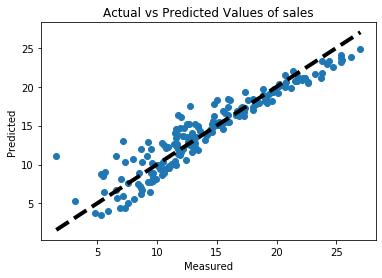

In [64]:
from sklearn.model_selection import cross_val_predict

predicted = cross_val_predict(model, X, y, cv = 10 )


fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set(title = "Actual vs Predicted Values of sales")
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## Important Metrics for Performance Evaluation

In [58]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Mean Absolute Error (MAE)

In [59]:
mae = mean_absolute_error(y_test,y_predict)
print('mae : ', mae)

mae :  1.2183907812889565


### Mean Squared Error (MSE)

In [60]:
mse = mean_squared_error(y_test,y_predict)
print('mse : ', mse)

mse :  3.4786471805200474


### Root Mean Squared Error (RMSE)

In [62]:
from math import sqrt

rmse = sqrt(mse)
print('RMSE : ', rmse)

RMSE :  1.8651131816916762


### R2 Score

In [61]:
score = r2_score(y_test, y_predict)
print('r2 score : ', score)

r2 score :  0.8660880295574687
